In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

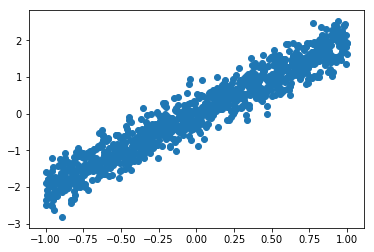

In [2]:
x= np.linspace (-1,1,1001)
y= 2 * x+ np.random.randn(*x.shape) * 0.33

plt.scatter(x,y)

In [3]:
def createline(x,w=0,b=0):
    return w*x+b  #mx+b line equation

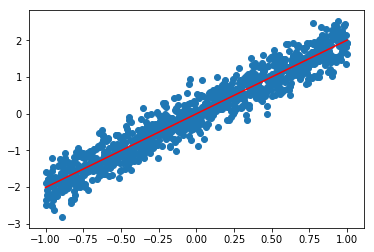

In [5]:
plt.scatter(x,y)
w=2.0087843
b= -0.0057927
predict = createline(x,w,b)

plt.plot(x,predict, c='r')
plt.show()

In [6]:
from keras import models
from keras import layers

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
model = models.Sequential()
model.add(layers.Dense(1,activation='relu', input_dim=1))

In [8]:
model.compile(optimizer='rmsprop' , loss= 'mse' , metrics=['mae','accuracy', 'mse'])

In [9]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
1001/1001 [==============================] - 1s 709us/step - loss: 1.8617 - mean_absolute_error: 1.1585 - acc: 0.0000e+00 - mean_squared_error: 1.8617
Epoch 2/100
1001/1001 [==============================] - 0s 140us/step - loss: 1.7943 - mean_absolute_error: 1.1368 - acc: 0.0000e+00 - mean_squared_error: 1.7943
Epoch 3/100
1001/1001 [==============================] - 0s 115us/step - loss: 1.7340 - mean_absolute_error: 1.1168 - acc: 0.0000e+00 - mean_squared_error: 1.7340
Epoch 4/100
1001/1001 [==============================] - 0s 120us/step - loss: 1.6756 - mean_absolute_error: 1.0976 - acc: 0.0000e+00 - mean_squared_error: 1.6756
Epoch 5/100
1001/1001 [==============================] - 0s 85us/step - loss: 1.6211 - mean_absolute_error: 1.0798 - acc: 0.0000e+00 - mean_squared_error: 1.6211
Epoch 6/100
1001/1001 [==============================] - 0s 91us/step - loss: 1.5716 - mean_absolute_error: 1.0641 - acc: 0.0000e+00 - mean_squared_error: 1.5716
Epoch 7/100
1001/1001 [=

1001/1001 [==============================] - 0s 109us/step - loss: 1.4446 - mean_absolute_error: 1.0270 - acc: 0.0000e+00 - mean_squared_error: 1.4446


In [10]:
model.evaluate(x,y)

1001/1001 [==============================] - 0s 90us/step


[1.444593273319088, 1.026955419606143, 0.0, 1.444593273319088]

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
w,b=model.get_weights()
w

array([[-0.29868305]], dtype=float32)

In [14]:
b

array([-0.29947007], dtype=float32)

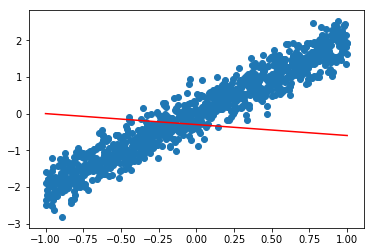

In [15]:
plt.scatter(x,y)
pline = createline(x,w[0],b)
plt.plot(x,pline,c='r')
plt.show()

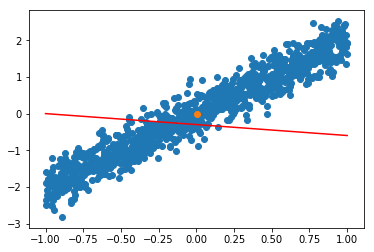

In [16]:
x1=[0.001]
y1 = model.predict(x1)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.plot(x,pline,c='r')
plt.show()

In [19]:
def softmax(x):
    prob = []
    for i in x:
        b=i/np.sum(x)
        prob.append(b)
    return prob     

In [20]:
data = np.array([1,3,5,6,7])
softmax(data)

[0.045454545454545456,
 0.13636363636363635,
 0.22727272727272727,
 0.2727272727272727,
 0.3181818181818182]

In [21]:
np.sum(softmax(data))

1.0

In [22]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [23]:
test = np.linspace(-10,10,101)
y1 = sigmoid(test)
y1

array([4.53978687e-05, 5.54485247e-05, 6.77241496e-05, 8.27172229e-05,
       1.01029194e-04, 1.23394576e-04, 1.50710358e-04, 1.84071905e-04,
       2.24816770e-04, 2.74578156e-04, 3.35350130e-04, 4.09567165e-04,
       5.00201107e-04, 6.10879359e-04, 7.46028834e-04, 9.11051194e-04,
       1.11253603e-03, 1.35851995e-03, 1.65880108e-03, 2.02532039e-03,
       2.47262316e-03, 3.01841632e-03, 3.68423990e-03, 4.49627316e-03,
       5.48629890e-03, 6.69285092e-03, 8.16257115e-03, 9.95180187e-03,
       1.21284350e-02, 1.47740317e-02, 1.79862100e-02, 2.18812709e-02,
       2.65969936e-02, 3.22954647e-02, 3.91657228e-02, 4.74258732e-02,
       5.73241759e-02, 6.91384203e-02, 8.31726965e-02, 9.97504891e-02,
       1.19202922e-01, 1.41851065e-01, 1.67981615e-01, 1.97816111e-01,
       2.31475217e-01, 2.68941421e-01, 3.10025519e-01, 3.54343694e-01,
       4.01312340e-01, 4.50166003e-01, 5.00000000e-01, 5.49833997e-01,
       5.98687660e-01, 6.45656306e-01, 6.89974481e-01, 7.31058579e-01,
      

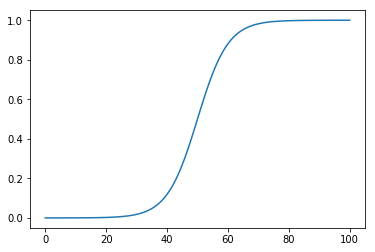

In [24]:
plt.plot(y1)
plt.show()

In [25]:
def relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [26]:
y1 = relu(test)
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

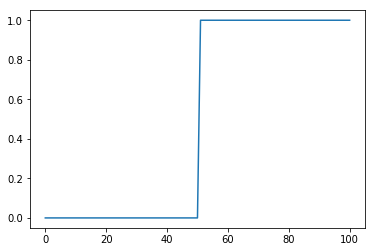

In [27]:
plt.plot(y1)
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

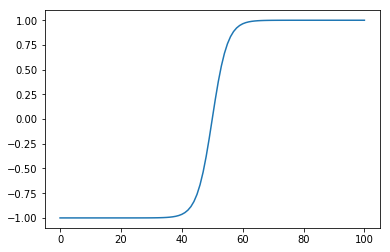

In [29]:
a = np.linspace(-10,10,101)
b = np.tanh(a)
plt.plot(b)
plt.show()

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) **2).mean())


In [31]:
def rmse1(predictions,targets):
    differences = predictions - targets
    differences_squared = differences **2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt( mean_of_differences_squared)
    return rmse_val

In [32]:
rmse(y,pline)

1.4009809537359479

In [1]:
import numpy as np
d = [0.000, 0.166, 0.333]
p = [0.000, 0.254, 0.998]

print("d is: " +str(["%.8f" % elem for elem in d]))
print("p is: " +str(["%.8f" % elem for elem in p]))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) **2).mean())

rmse_val = rmse(np.array(d), np.array(p))
print("rms error is: " + str(rmse_val))

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
rms error is: 0.3872849941150143


In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 459s 40us/step


In [3]:
print("Train Image shape: " , train_images.shape)
print("Len of train labels: ", len(train_labels))
train_labels

Train Image shape:  (60000, 28, 28)
Len of train labels:  60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
print("test Image shape: " , test_images.shape)
print("Len of train labels: ", len(test_labels))
train_labels

test Image shape:  (10000, 28, 28)
Len of train labels:  10000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu' ,input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [9]:
network.compile(optimizer='rmsprop',
               loss= 'categorical_crossentropy',
               metrics= ['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_images.size

47040000

In [11]:
from keras.utils import to_categorical 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.2556 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.1028 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0679 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0490 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0370 - acc: 0.9888


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 129us/step


In [14]:
print("Accuracy : " , test_acc , "\n Test Loss Value: " , test_loss)

Accuracy :  0.9805 
 Test Loss Value:  0.06790016092094593


In [15]:
digit = train_images[0]
digit.shape
p=network.predict(test_images[0:1], verbose=1)
p

1/1 [==============================] - 0s 21ms/step


array([[3.6745937e-09, 1.3828666e-10, 1.1441846e-06, 9.7563370e-06,
        4.0990258e-12, 4.1703238e-08, 1.8226675e-13, 9.9998879e-01,
        2.3421256e-08, 2.8248158e-07]], dtype=float32)